<h1> <strong> Tarefa 2: Estudando histogramas e transformações em imagens </strong> </h1>
<p> Antonio Pilan. NUSP: 10562611 </p>

<h3>Ferramentas: OpenCV, Matplotlib e Numpy</h3>

<p>
Inicialmente, vamos inserir um histograma no ambiente Python. Vamos usar a mesma imagem usada na tarefa passada e analisar o histograma dela:
</p>

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

<p>
Vamos ver a imagem e seu histograma usando o pacote do Matplotlib.

Ao criar o histograma com as coordenadas <strong>ax2</strong> defino já <i style="color: skyblue">density=True</i> que já faz o papel da normalização do histograma, assim, estamos olhando para distribuição de probabilidades dos pixeis da fotografia 
</p>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

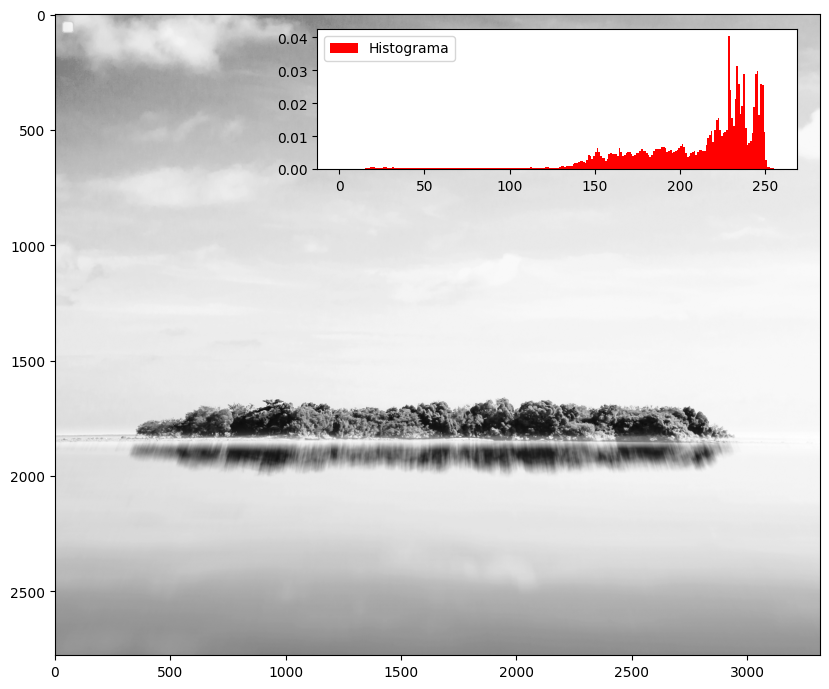

In [7]:
img = cv.imread('img_tarefa1.jpg') 

plt.rcParams["figure.figsize"] = [12, 7]

fig, ax1 = plt.subplots()
ax1.imshow(img)


l, b, h, w = .4, .75, .2, .4
ax2 = fig.add_axes([l, b, w, h])
ax2.hist(img.ravel(),256,[0,256], color="r", density=True, label="Histograma")
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

plt.show

<h3>Operações de transformação da imagem: Operações ponto à ponto</h3>

<p>
Primeiro, vamos usar o histograma pra deixar essa imagem mais escura e contrastada.

Um dos métodos de realizar o ajuste é fazendo uma função linear atuar sobre cada pixel, levando um ponto da imagem inicial até um ponto transformado na imagem processada:

\begin{equation}
g = \alpha f + \beta
\end{equation}

Usaremos valores arbitrários $\alpha$ e $\beta$ desde que respeitem nosso objetivo: <strong>aumentar o contraste e diminuir o brilho total</strong>
</p>



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

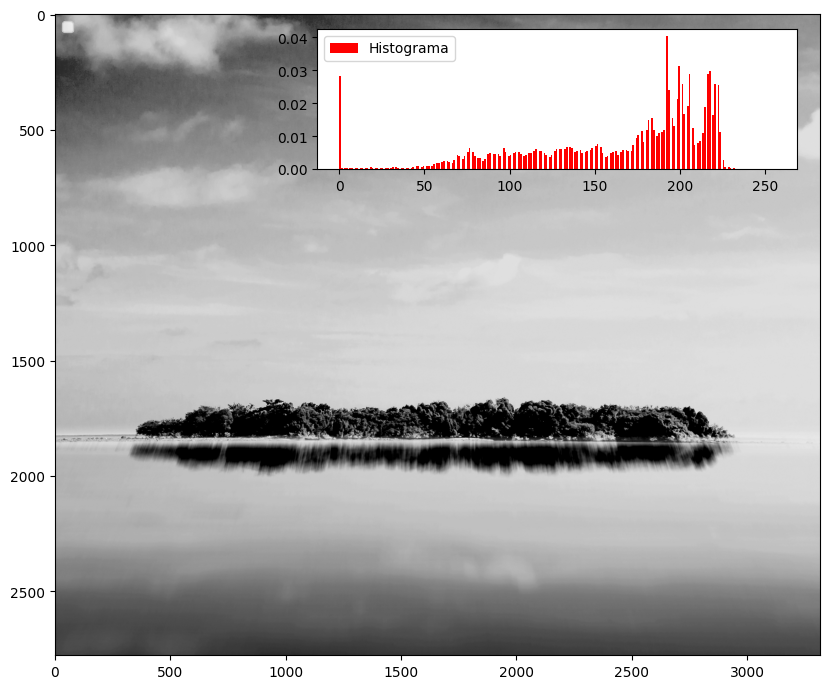

In [6]:
new_image = np.zeros(img.shape, img.dtype)

alpha = 1.5 
beta = -150

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        for c in range(img.shape[2]):
            new_image[y,x,c] = np.clip(alpha*img[y,x,c] + beta, 0, 255)
            
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.autolayout"] = True

fig, ax1 = plt.subplots()
ax1.imshow(new_image)


l, b, h, w = .4, .75, .2, .4
ax2 = fig.add_axes([l, b, w, h])
ax2.hist(new_image.ravel(),256,[0,256], color="r", density=True, label="Histograma")
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

plt.show


<p>
É possível perceber que alguns valores colapsaram na parte esquerda do histograma, isso acontece porque alguns pedaços da imagens <i><strong>já estavam perto do "preto absoluto", correspondendo a 0 na escala de cinzas, portanto, perdemos informação nesses pontos.</i></strong>

Já nos tons mais claros não perdemos informação, pois mantivemos o comportamento em intensidades mais altas.

Uma coisa que já podemos concluir é que a fotografia foi muito bem exposta, não perdeu informação nem pro escuro e nem pro claro mesmo tendo os dois extremos presentes na foto.
</p>